In [1]:
import json
from sn_gamestate.calibration.nbjw_calib import NBJW_Calib_Keypoints

import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/emilyw/miniconda3/envs/tracklab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('data/SoccerNetGS/test/SNGS-116/Labels-GameState.json') as f:
    data = json.load(f)

notes_df = pd.DataFrame(data["annotations"])

detections = notes_df[notes_df["image_id"] == '3116000001']
objects_img1 = detections[detections["supercategory"] == "object"]
display(objects_img1)
display(objects_img1["bbox_image"])
print(list(objects_img1["bbox_image"]))
bbox_list = list(objects_img1["bbox_image"])

,id,image_id,track_id,supercategory,category_id,attributes,bbox_image,bbox_pitch,bbox_pitch_raw,lines
0,3116000001,3116000001,1.0,object,1,"{'role': 'player', 'jersey': '4', 'team': 'left'}","{'x': 136, 'y': 520, 'x_center': 161.5, 'y_cen...","{'x_bottom_left': 29.248984434691206, 'y_botto...","{'x_bottom_left': 29.080245470992793, 'y_botto...",NaN
1,3116000002,3116000001,2.0,object,1,"{'role': 'player', 'jersey': '93', 'team': 'le...","{'x': 478, 'y': 565, 'x_center': 503.5, 'y_cen...","{'x_bottom_left': 30.48215393895095, 'y_bottom...","{'x_bottom_left': 30.46795200356605, 'y_bottom...",NaN
2,3116000003,3116000001,3.0,object,1,"{'role': 'player', 'jersey': '25', 'team': 'ri...","{'x': 565, 'y': 518, 'x_center': 589.0, 'y_cen...","{'x_bottom_left': 34.05922855899436, 'y_bottom...","{'x_bottom_left': 34.00504763725415, 'y_bottom...",NaN
3,3116000004,3116000001,4.0,object,3,"{'role': 'referee', 'jersey': None, 'team': None}","{'x': 468, 'y': 433, 'x_center': 491.0, 'y_cen...","{'x_bottom_left': 38.19082152471638, 'y_bottom...","{'x_bottom_left': 38.16749162328837, 'y_bottom...",NaN
4,3116000005,3116000001,5.0,object,1,"{'role': 'player', 'jersey': None, 'team': 'le...","{'x': 557, 'y': 302, 'x_center': 574.0, 'y_cen...","{'x_bottom_left': 54.15617004388591, 'y_bottom...","{'x_bottom_left': 54.13456101330073, 'y_bottom...",NaN
5,3116000006,3116000001,6.0,object,1,"{'role': 'player', 'jersey': '11', 'team': 'le...","{'x': 935, 'y': 548, 'x_center': 964.5, 'y_cen...","{'x_bottom_left': 35.7854641078162, 'y_bottom_...","{'x_bottom_left': 35.570310875020816, 'y_botto...",NaN
6,3116000007,3116000001,7.0,object,1,"{'role': 'player', 'jersey': '34', 'team': 'ri...","{'x': 981, 'y': 541, 'x_center': 1015.5, 'y_ce...","{'x_bottom_left': 36.59722097273192, 'y_bottom...","{'x_bottom_left': 36.50599856298994, 'y_bottom...",NaN
7,3116000008,3116000001,8.0,object,1,"{'role': 'player', 'jersey': '44', 'team': 'le...","{'x': 1061, 'y': 488, 'x_center': 1081.0, 'y_c...","{'x_bottom_left': 41.323750892043826, 'y_botto...","{'x_bottom_left': 41.122472164276736, 'y_botto...",NaN
8,3116000009,3116000001,9.0,object,1,"{'role': 'player', 'jersey': '33', 'team': 'ri...","{'x': 1096, 'y': 487, 'x_center': 1128.0, 'y_c...","{'x_bottom_left': 41.7921043775938, 'y_bottom_...","{'x_bottom_left': 41.58060713820998, 'y_bottom...",NaN
9,3116000010,3116000001,10.0,object,1,"{'role': 'player', 'jersey': '20', 'team': 'ri...","{'x': 1288, 'y': 457, 'x_center': 1314.5, 'y_c...","{'x_bottom_left': 46.630270783992664, 'y_botto...","{'x_bottom_left': 46.57666616695442, 'y_bottom...",NaN


0     {'x': 136, 'y': 520, 'x_center': 161.5, 'y_cen...
1     {'x': 478, 'y': 565, 'x_center': 503.5, 'y_cen...
2     {'x': 565, 'y': 518, 'x_center': 589.0, 'y_cen...
3     {'x': 468, 'y': 433, 'x_center': 491.0, 'y_cen...
4     {'x': 557, 'y': 302, 'x_center': 574.0, 'y_cen...
5     {'x': 935, 'y': 548, 'x_center': 964.5, 'y_cen...
6     {'x': 981, 'y': 541, 'x_center': 1015.5, 'y_ce...
7     {'x': 1061, 'y': 488, 'x_center': 1081.0, 'y_c...
8     {'x': 1096, 'y': 487, 'x_center': 1128.0, 'y_c...
9     {'x': 1288, 'y': 457, 'x_center': 1314.5, 'y_c...
10    {'x': 1387, 'y': 432, 'x_center': 1403.0, 'y_c...
11    {'x': 1419, 'y': 425, 'x_center': 1437.5, 'y_c...
12    {'x': 1433, 'y': 452, 'x_center': 1465.5, 'y_c...
13    {'x': 1461, 'y': 446, 'x_center': 1477.5, 'y_c...
14    {'x': 1457, 'y': 446, 'x_center': 1470.5, 'y_c...
15    {'x': 1479, 'y': 449, 'x_center': 1493.5, 'y_c...
16    {'x': 1498, 'y': 444, 'x_center': 1509.5, 'y_c...
17    {'x': 1511, 'y': 443, 'x_center': 1532.0, 

[{'x': 136, 'y': 520, 'x_center': 161.5, 'y_center': 587.5, 'w': 51, 'h': 135}, {'x': 478, 'y': 565, 'x_center': 503.5, 'y_center': 635.0, 'w': 51, 'h': 140}, {'x': 565, 'y': 518, 'x_center': 589.0, 'y_center': 580.0, 'w': 48, 'h': 124}, {'x': 468, 'y': 433, 'x_center': 491.0, 'y_center': 489.5, 'w': 46, 'h': 113}, {'x': 557, 'y': 302, 'x_center': 574.0, 'y_center': 344.0, 'w': 34, 'h': 84}, {'x': 935, 'y': 548, 'x_center': 964.5, 'y_center': 618.0, 'w': 59, 'h': 140}, {'x': 981, 'y': 541, 'x_center': 1015.5, 'y_center': 609.5, 'w': 69, 'h': 137}, {'x': 1061, 'y': 488, 'x_center': 1081.0, 'y_center': 549.0, 'w': 40, 'h': 122}, {'x': 1096, 'y': 487, 'x_center': 1128.0, 'y_center': 548.0, 'w': 64, 'h': 122}, {'x': 1288, 'y': 457, 'x_center': 1314.5, 'y_center': 513.5, 'w': 53, 'h': 113}, {'x': 1387, 'y': 432, 'x_center': 1403.0, 'y_center': 487.0, 'w': 32, 'h': 110}, {'x': 1419, 'y': 425, 'x_center': 1437.5, 'y_center': 477.5, 'w': 37, 'h': 105}, {'x': 1433, 'y': 452, 'x_center': 1465.5,

In [3]:
def convert_to_ltwh(bbox_dict):
    # Extract values from the dictionary
    x = bbox_dict['x']
    y = bbox_dict['y']
    x_center = bbox_dict['x_center']
    y_center = bbox_dict['y_center']
    w = bbox_dict['w']
    h = bbox_dict['h']
    
    # Calculate ltwh
    left = x_center - (w / 2)
    top = y_center - (h / 2)
    width = w
    height = h
    
    # Return the bbox in ltwh format (left, top, width, height)
    return [left, top, width, height]

# Example usage:
bbox_dict = {'x': 136, 'y': 520, 'x_center': 161.5, 'y_center': 587.5, 'w': 51, 'h': 135}
ltwh_bbox = convert_to_ltwh(bbox_dict)
# print(ltwh_bbox)

ltwh_list = [convert_to_ltwh(bbox) for bbox in bbox_list]
print(ltwh_list)


[[136.0, 520.0, 51, 135], [478.0, 565.0, 51, 140], [565.0, 518.0, 48, 124], [468.0, 433.0, 46, 113], [557.0, 302.0, 34, 84], [935.0, 548.0, 59, 140], [981.0, 541.0, 69, 137], [1061.0, 488.0, 40, 122], [1096.0, 487.0, 64, 122], [1288.0, 457.0, 53, 113], [1387.0, 432.0, 32, 110], [1419.0, 425.0, 37, 105], [1433.0, 452.0, 65, 107], [1461.0, 446.0, 33, 125], [1457.0, 446.0, 27, 109], [1479.0, 449.0, 29, 119], [1498.0, 444.0, 23, 122], [1511.0, 443.0, 42, 123], [1527.0, 444.0, 44, 114], [474.0, 381.0, 12, 11]]


In [4]:
# from sn_gamestate.calibration.nbjw_calib import NBJW_Calib_Keypoints

# Example values, you may want to load these from your actual YAML file
model_dir = "/Users/emilyw/College_Pt_2/S1/Big_Data_Analytics/Final_Proj/Test_Implementations/soccernet/sn-gamestate/pretrained_models"  # Replace with actual model directory
cfg = {
    "MODEL": {
        "IMAGE_SIZE": [960, 540],
        "NUM_JOINTS": 58,
        "PRETRAIN": '',
        "EXTRA": {
            "FINAL_CONV_KERNEL": 1,
            "STAGE1": {
                "NUM_MODULES": 1,
                "NUM_BRANCHES": 1,
                "BLOCK": "BOTTLENECK", 
                "NUM_BLOCKS": [4],
                "NUM_CHANNELS": [64],
                "FUSE_METHOD": "SUM"
            },
            "STAGE2": {
                "NUM_MODULES": 1,
                "NUM_BRANCHES": 2,
                "BLOCK": "BASIC",
                "NUM_BLOCKS": [4, 4],
                "NUM_CHANNELS": [48, 96],
                "FUSE_METHOD": "SUM"
            },
            "STAGE3": {
                "NUM_MODULES": 4,
                "NUM_BRANCHES": 3,
                "BLOCK": "BASIC",
                "NUM_BLOCKS": [4, 4, 4],
                "NUM_CHANNELS": [48, 96, 192],
                "FUSE_METHOD": "SUM"
            },
            "STAGE4": {
                "NUM_MODULES": 3,
                "NUM_BRANCHES": 4,
                "BLOCK": "BASIC",
                "NUM_BLOCKS": [4, 4, 4, 4], 
                "NUM_CHANNELS": [48, 96, 192, 384],
                "FUSE_METHOD": "SUM"
            }
        }
    }
}

cfg_l = {
    "MODEL": {
        "IMAGE_SIZE": [960, 540],
        "NUM_JOINTS": 24,
        "PRETRAIN": '',
        "EXTRA": {
            "FINAL_CONV_KERNEL": 1,
            "STAGE1": {
                "NUM_MODULES": 1,
                "NUM_BRANCHES": 1,
                "BLOCK": "BOTTLENECK",
                "NUM_BLOCKS": [4],
                "NUM_CHANNELS": [64],
                "FUSE_METHOD": "SUM"
            },
            "STAGE2": {
                "NUM_MODULES": 1,
                "NUM_BRANCHES": 2,
                "BLOCK": "BASIC",
                "NUM_BLOCKS": [4, 4],
                "NUM_CHANNELS": [48, 96],
                "FUSE_METHOD": "SUM"
            },
            "STAGE3": {
                "NUM_MODULES": 4,
                "NUM_BRANCHES": 3,
                "BLOCK": "BASIC",
                "NUM_BLOCKS": [4, 4, 4],
                "NUM_CHANNELS": [48, 96, 192],
                "FUSE_METHOD": "SUM"
            },
            "STAGE4": {
                "NUM_MODULES": 3,
                "NUM_BRANCHES": 4,
                "BLOCK": "BASIC",
                "NUM_BLOCKS": [4, 4, 4, 4],
                "NUM_CHANNELS": [48, 96, 192, 384],
                "FUSE_METHOD": "SUM"
            }
        }
    }
}

# Paths to the checkpoints (replace with actual paths)
checkpoint_kp = f"{model_dir}/calibration/SV_kp"
checkpoint_l = f"{model_dir}/calibration/SV_lines"

# Instantiate the class using the data from the YAML
tracking_dataset = NBJW_Calib_Keypoints(
    checkpoint_kp=checkpoint_kp,
    checkpoint_l=checkpoint_l,
    image_width=1920,
    image_height=1080,
    batch_size=1,
    device="cpu",
    cfg=cfg,
    cfg_l=cfg_l
)

# Use the tracking_dataset object as needed
print(tracking_dataset)


In [5]:

# import cv2
# import pandas as pd
curr_dir = "./data/SoccerNetGS/test/SNGS-116/"
image = cv2.imread(curr_dir + "/img1/000001.jpg")
image2 = cv2.imread(curr_dir + "/img1/000002.jpg")
image3 = cv2.imread(curr_dir + "/img1/000003.jpg")
image4 = cv2.imread(curr_dir + "/img1/000004.jpg")

In [6]:
# detections = pd.DataFrame({
#     'bbox_ltwh': [
#         [100, 200, 150, 250],  # Example bounding box: [left, top, right, bottom]
#         [120, 220, 170, 270],  # Another bounding box
#     ],
#     # Other columns like object class or confidence scores could go here.
# })

detections = pd.DataFrame({
    'bbox_ltwh': ltwh_list,
    # Other columns like object class or confidence scores could go here.
})
# detections = pd.DataFrame()

metadata = pd.DataFrame()

# metadata = pd.DataFrame({
#     'keypoints': [
#         {'1': {'x': 150, 'y': 200}, '2': {'x': 160, 'y': 220}},  # Detected keypoints (index, x, y)
#         {'1': {'x': 120, 'y': 180}, '2': {'x': 130, 'y': 210}},  # Another set of keypoints
#     ],
#     # Additional metadata like image width, height, or timestamps could go here.
# })


img = tracking_dataset.preprocess(image, detections, metadata)
output = tracking_dataset.process(img, detections, metadata)

In [7]:
# print(type(img))
# print(img)


In [8]:
# # output = tracking_dataset.process(img, detections, metadata)

# lines_outs = []
# kp_outs = []

# def extract_keypoints(keypoints):
#     return {k: {'x': v['x'], 'y': v['y']} for k, v in keypoints.items()}

# def iterative_detection(image, max_iterations=3):
#     metadata = pd.DataFrame(columns=["keypoints"])  # Start with an empty dataframe for detections
#     for i in range(max_iterations):
#         print(i)
#         # First pass or subsequent pass with previous metadata
#         # metadata = pd.Series(detections) if not detections.empty else pd.Series()  # Use previous detections if available
#         batch = tracking_dataset.preprocess(image, detections, pd.DataFrame())
        
#         # Process the image with the model
#         _, output = tracking_dataset.process(batch, detections, metadata)
#         display(output)
#         # print(output)
#         print(output.columns)

#         this_lines = output.iloc[0]["lines"]
#         this_kp = output.iloc[0]["keypoints"]
#         lines_outs.append(this_lines)
#         # kp_outs.append(this_kp)

#         new_kps = extract_keypoints(this_kp)
#         kp_outs.append(new_kps)
#         new_metadata = pd.DataFrame({
#             'keypoints': [new_kps]  # Each new entry is a dictionary of keypoints
#         })

#         metadata = pd.concat([metadata, new_metadata], ignore_index=True)

#         # pts = []
#         # for a_point in this_kp:
#         #     pts.append([this_kp[a_point]['x'], this_kp[a_point]['y']])
                
#         # Update the detections with the new output
#         # metadata = metadata + pts
        
#         # Optionally, you could use output_metadata to further adjust the model's behavior
#         # image = update_metadata_with_keypoints(metadata, this_kp)  # Example update function

#     return output, metadata

# out, md = iterative_detection(image)
# print(out, md)


In [9]:
# a = [1, 2, 3]
# b = [3, 4, 5]
# print(a + b)

In [10]:
print(output[1])
print(output)

                                           keypoints  \
0  {3: {'x': 0.25, 'y': 0.35555555555555557, 'p':...   

                                               lines  
0  {'Big rect. right main': [{'x': 0.047916666666...  
(Empty DataFrame
Columns: []
Index: [],                                            keypoints  \
0  {3: {'x': 0.25, 'y': 0.35555555555555557, 'p':...   

                                               lines  
0  {'Big rect. right main': [{'x': 0.047916666666...  )


In [11]:
display(output[1])
print(output[1].iloc[0]["lines"])
print(output[1].iloc[0]["keypoints"])
print(output[1].iloc[0]["lines"]['Small rect. right main'])

,keypoints,lines
0,"{3: {'x': 0.25, 'y': 0.35555555555555557, 'p':...",{'Big rect. right main': [{'x': 0.047916666666...


{'Big rect. right main': [{'x': 0.04791666666666667, 'y': 0.46296296296296297}], 'Big rect. right top': [{'x': 0.04791666666666667, 'y': 0.46296296296296297}, {'x': 0.32916666666666666, 'y': 0.42407407407407405}, {'x': 0.44166666666666665, 'y': 0.4074074074074074}], 'Goal left crossbar': [{'x': 0.9375, 'y': 0.3814814814814815}], 'Goal left post left': [{'x': 0.9375, 'y': 0.3814814814814815}], 'Goal right crossbar': [{'x': 0.7541666666666667, 'y': 0.34074074074074073}, {'x': 0.9375, 'y': 0.37777777777777777}], 'Goal right post left': [{'x': 0.7541666666666667, 'y': 0.34074074074074073}], 'Goal right post right': [{'x': 0.9375, 'y': 0.37777777777777777}, {'x': 0.9354166666666667, 'y': 0.5333333333333333}], 'Side line right': [{'x': 0.25, 'y': 0.35555555555555557}, {'x': 0.44166666666666665, 'y': 0.4074074074074074}, {'x': 0.9354166666666667, 'y': 0.5333333333333333}], 'Side line top': [{'x': 0.1375, 'y': 0.3685185185185185}, {'x': 0.25, 'y': 0.35555555555555557}], 'Small rect. right bott

In [12]:
points_dict = output[1].iloc[0]["lines"]
pts = []
for a_dict in points_dict["Small rect. right bottom"]:
    pts.append([a_dict['x'], a_dict['y']])

# points_dict = output[1].iloc[0]["keypoints"]
# print(points_dict)
# pts = []
# for a_point in points_dict:
#     pts.append([points_dict[a_point]['x'], points_dict[a_point]['y']])

In [13]:
# import matplotlib.pyplot as plt
# import numpy as np

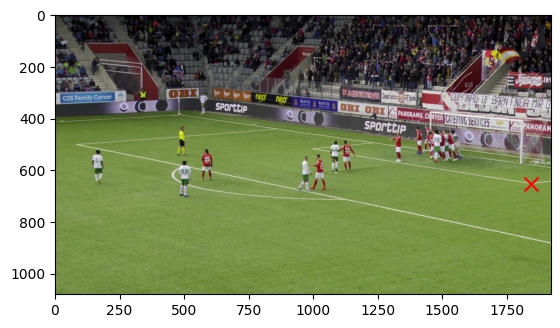

In [14]:
image = plt.imread(curr_dir + "/img1/000001.jpg")
height, width = image.shape[:2]
pts = np.array(pts)

pixel_coords = pts * [width, height]

plt.imshow(image)
# plt.plot(640, 570, "og", markersize=10)  # og:shorthand for green circle
plt.scatter(pixel_coords[:, 0], pixel_coords[:, 1], marker="x", color="red", s=100)
plt.show()